In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [41]:
df = pd.read_csv('insurance.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [43]:
df.corr()

,id,age,bmi,children,charges
id,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


In [50]:
print(df.to_string())

        id  age     sex    bmi  children smoker     region   charges
0     1001   19  female  27.90         0    yes  southwest  16884.92
1     1002   18    male  33.77         1     no  southeast   1725.55
2     1003   28    male  33.00         3     no  southeast   4449.46
3     1004   33    male  22.70         0     no  northwest  21984.47
4     1005   32    male  28.88         0     no  northwest   3866.86
5     1006   31  female  25.74         0     no  southeast   3756.62
6     1007   46  female  33.44         1     no  southeast   8240.59
7     1008   37  female  27.74         3     no  northwest   7281.51
8     1009   37    male  29.83         2     no  northeast   6406.41
9     1010   60  female  25.84         0     no  northwest  28923.14
10    1011   25    male  26.22         0     no  northeast   2721.32
11    1012   62  female  26.29         0    yes  southeast  27808.73
12    1013   23    male  34.40         0     no  southwest   1826.84
13    1014   56  female  39.82    

In [47]:
df['bmi'] = df['bmi'].round(2)

In [49]:
df['charges'] = df['charges'].round(2)

In [52]:
df.describe()

,id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1669.500000,39.207025,30.663572,1.094918,13270.422280
std,386.391641,14.049960,6.097951,1.205493,12110.011259
min,1001.000000,18.000000,15.960000,0.000000,1121.870000
25%,1335.250000,27.000000,26.297500,0.000000,4740.287500
50%,1669.500000,39.000000,30.400000,1.000000,9382.030000
75%,2003.750000,51.000000,34.692500,2.000000,16639.915000
max,2338.000000,64.000000,53.130000,5.000000,63770.430000


In [73]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [74]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [75]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

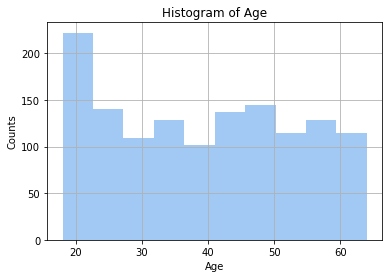

In [71]:
df['age'].hist()
plt.title('Histogram of Age')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.show()


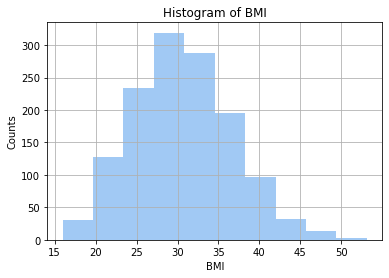

In [72]:
df['bmi'].hist()
plt.title('Histogram of BMI')
plt.ylabel('Counts')
plt.xlabel('BMI')
plt.show()

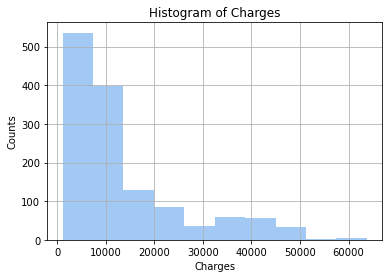

In [81]:
df['charges'].hist()
plt.title('Histogram of Charges')
plt.ylabel('Counts')
plt.xlabel('Charges')
# plt.grid(axis = 'y',alpha = 0.5)
plt.show()

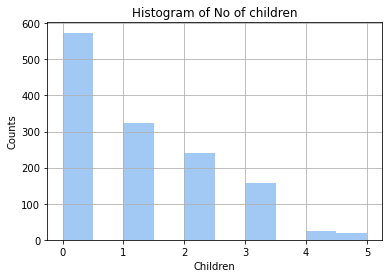

In [86]:
df['children'].hist()
plt.title('Histogram of No of children')
plt.ylabel('Counts')
plt.xlabel('Children')
plt.show()

In [83]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

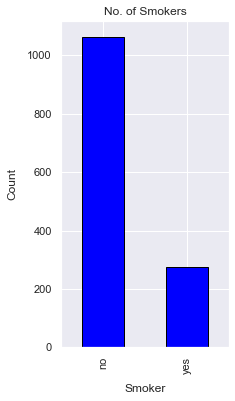

In [108]:
sb.set(font_scale=1)
barplot1 = df['smoker'].value_counts().plot(kind='bar', figsize=(3,6), color='blue', edgecolor = 'black')
plt.xlabel("Smoker", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.title('No. of Smokers')
plt.show()

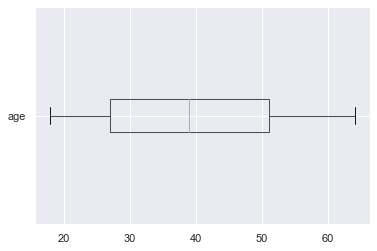

In [109]:
df.boxplot('age',vert = False)

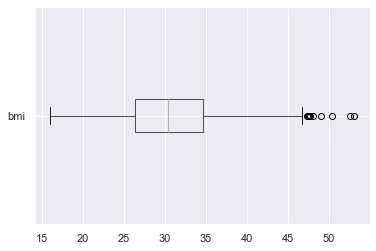

In [110]:
df.boxplot('bmi',vert = False)

In [111]:
df['bmi'].describe()

count    1338.000000
mean       30.663572
std         6.097951
min        15.960000
25%        26.297500
50%        30.400000
75%        34.692500
max        53.130000
Name: bmi, dtype: float64

In [114]:
def num_outliers(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    return ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum()

In [115]:
num_outliers('bmi')

9

In [116]:
num_outliers('charges')

139

In [117]:
num_outliers('age')

0

In [121]:
df['charges'].groupby(df['smoker']).mean()

smoker
no      8434.268299
yes    32050.231898
Name: charges, dtype: float64

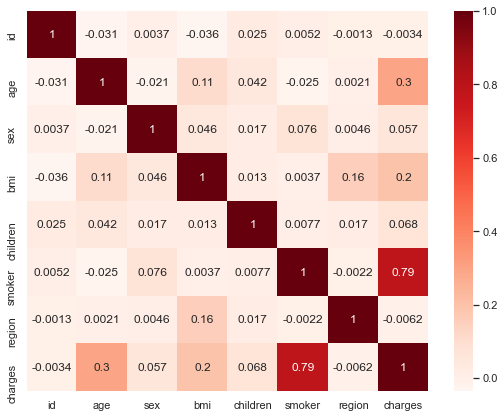

In [201]:
corr = df.corr()
plt.figure(figsize=(9, 7))
sb.heatmap(corr, annot=True, cmap = 'Reds')

In [131]:
for x in ['sex', 'children', 'smoker', 'region']:
    df[x] = df[x].astype('category')
    
col_category = df.select_dtypes(['category']).columns

In [133]:
df[col_category] = df[col_category].apply(lambda x: x.cat.codes)

In [135]:
df['charges'].groupby(df['smoker']).describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1064.0,8434.268299,5993.781789,1121.87,3986.4425,7345.405,11362.890,36910.61
1,274.0,32050.231898,11541.547246,12829.46,20826.2450,34456.350,41019.205,63770.43


Text(0.5, 1.0, 'Charge vs Age')

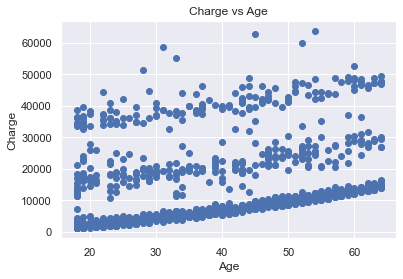

In [200]:
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Charge')
plt.title('Charge vs Age')

In [156]:
k = df.groupby(['smoker','sex'])
df_charges = k['charges']
df_charges.agg('describe')

count          mean           std       min       25%       50%  \
smoker sex                                                                    
0      0    547.0   8762.297185   6060.775917   1607.51   4265.60   7639.42   
       1    517.0   8087.204855   5908.108998   1121.87   3659.35   6985.51   
1      0    115.0  30678.996087  11907.536606  13844.51  19696.43  28950.47   
       1    159.0  33042.006226  11202.670775  12829.46  21241.53  36085.22   

                  75%       max  
smoker sex                       
0      0    11786.170  36910.61  
       1    10959.330  32108.66  
1      0    40918.315  63770.43  
       1    41797.590  62592.87

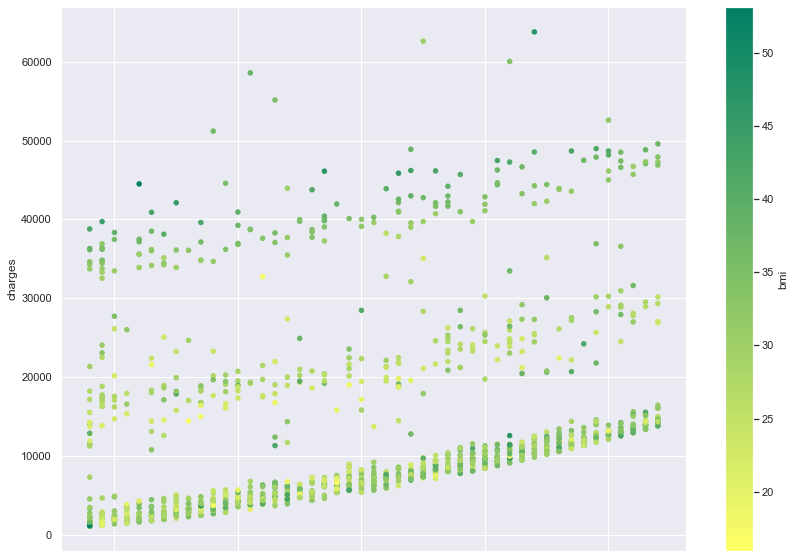

In [160]:
df.plot(kind="scatter", x="age", y="charges", figsize=(14,10),
    c='bmi', cmap=plt.get_cmap("summer_r"), colorbar=True)

In [164]:
df.dtypes

id            int64
age           int64
sex            int8
bmi         float64
children       int8
smoker         int8
region         int8
charges     float64
dtype: object

In [199]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [204]:
df['charges'].groupby(df['sex']).mean()

sex
0    12569.578716
1    13956.751331
Name: charges, dtype: float64